In [1]:
import h5py
import matplotlib.pyplot as plt

In [2]:
# brain images can vary in dimensions, resolutions, or other characteristics, 
# making it easier to store each image as a separate dataset within a group.

f = h5py.File('../data/cell_data.h5', 'r')
display(f.keys(), 
        type(f['B01']), # group
        type(f['B01'].get('0000'))) # dataset

<KeysViewHDF5 ['B01', 'B02', 'B05', 'B07', 'B20']>

h5py._hl.group.Group

h5py._hl.dataset.Dataset

In [3]:
B01, B02, B05, B07, B20 = f['B01'], f['B02'], f['B05'], f['B07'], f['B20']

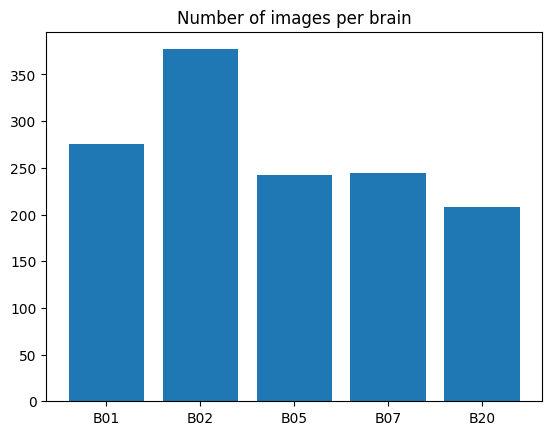

In [4]:
plt.bar(['B01', 'B02', 'B05', 'B07', 'B20'], 
        [len(B01.keys()), len(B02.keys()), len(B05.keys()), len(B07.keys()), len(B20.keys())])
plt.title('Number of images per brain')
plt.show()


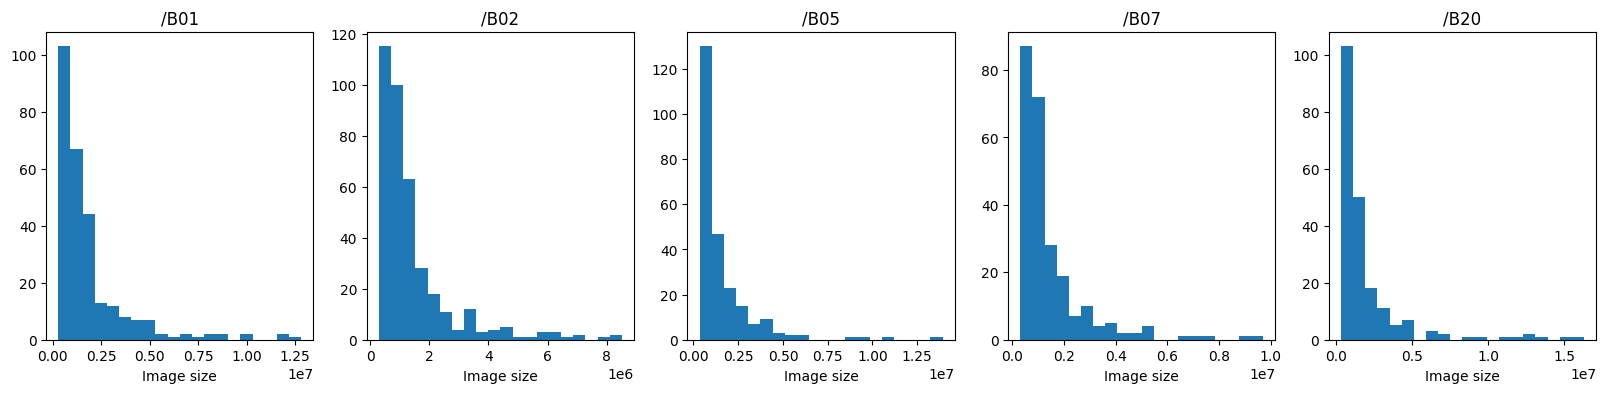

In [5]:
def plot_image_sizes(group):
    sizes = [group.get(image).size for image in group.keys()]
    plt.hist(sizes, bins=20)
    plt.xlabel('Image size')  
      
plt.figure(figsize=(20, 4))
for i, group in enumerate([B01, B02, B05, B07, B20]):
    plt.subplot(1, 5, i+1)
    plot_image_sizes(group)
    plt.title(group.name)
plt.show()    
      


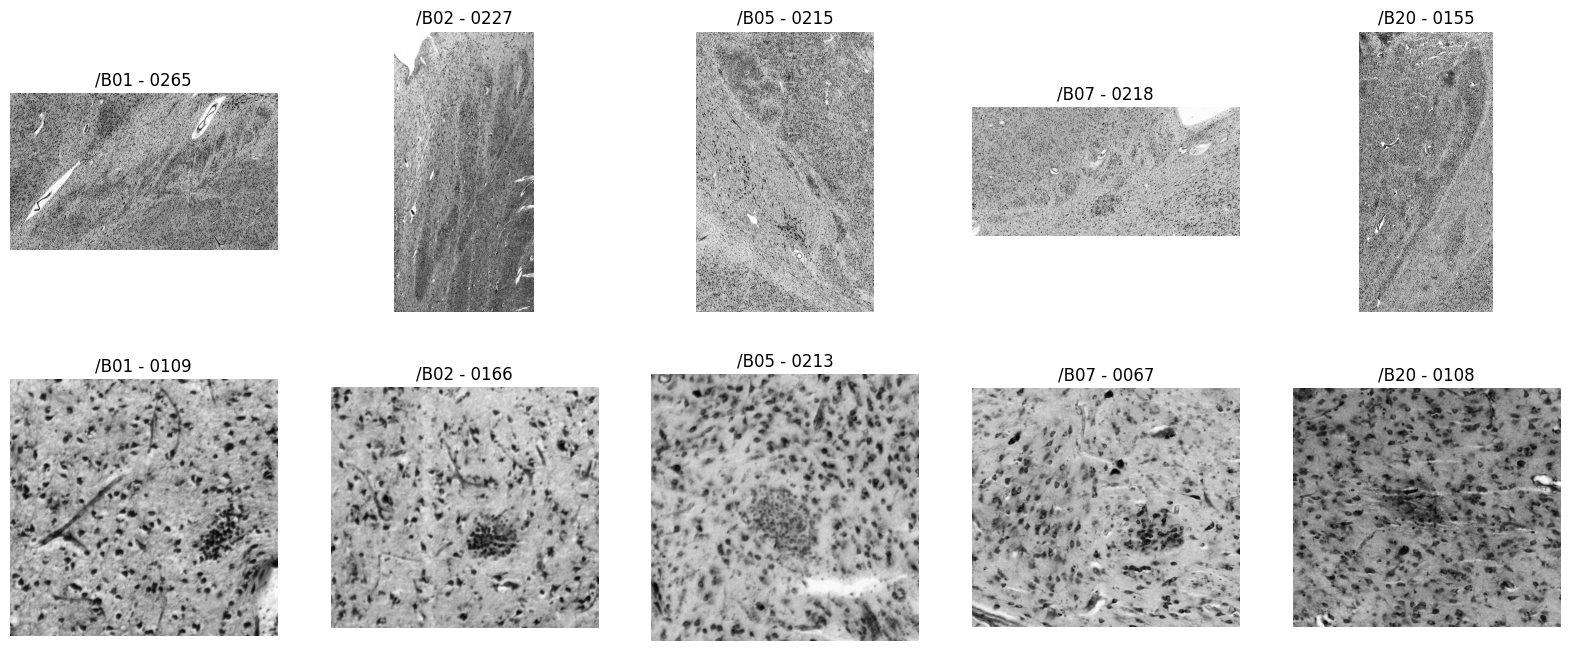

In [6]:
def get_largest_and_smallest_images(group):
    images = list(group.keys())
    sizes = [group.get(image).size for image in images]
    largest_image = images[sizes.index(max(sizes))]
    smallest_image = images[sizes.index(min(sizes))]
    return largest_image, smallest_image

def plot_image(group, image):
    plt.imshow(group.get(image), cmap='gray')
    plt.axis('off')
    plt.title(group.name + ' - ' + image)
    
plt.figure(figsize=(20, 8))
for i, group in enumerate([B01, B02, B05, B07, B20]):
    plt.subplot(2, 5, i+1)
    largest_image, smallest_image = get_largest_and_smallest_images(group)
    plot_image(group, largest_image)
    plt.subplot(2, 5, i+6)
    plot_image(group, smallest_image)
plt.show()


We decide to use B20 as the brain to use as the test dataset, and the rest as the training dataset. 
The main reason is the low amount of data compared to the other groups and we want as much as possible for training.

In [ ]:
def get_global_stats(group):
    images = list(group.keys())
    maxs = [int(group.get(image)[:].max()) for image in images]
    mins = [int(group.get(image)[:].min()) for image in images]
    means = [float(group.get(image)[:].mean()) for image in images]
    stds = [float(group.get(image)[:].std()) for image in images]
    return max(maxs), min(mins), sum(means)/len(means), sum(stds)/len(stds)

import pandas as pd
stats = pd.DataFrame(columns=['max', 'min', 'mean', 'std'])

for group in [B01, B02, B05, B07, B20]:
    max_, min_, mean_, std_ = get_global_stats(group)
    stats.loc[group.name] = [max_, min_, mean_, std_]
    
stats.to_csv('global_stats.csv')

In [8]:
stats

,max,min,mean,std
/B01,255.0,0.0,134.720784,43.318446
/B02,255.0,0.0,138.087388,36.883357
/B05,255.0,3.0,165.436277,38.488642
/B07,255.0,8.0,186.956242,36.199547
/B20,255.0,0.0,128.061689,42.408128
